
# Problem Statement

An education company named 'X Education' that sells online courses to industry professionals, is targeting to improve its poor lead conversion rate of 30% to around 80% in the future. In order to achieve this target set by its CEO, 'X Education' needs a model to identify the most promising leads or 'Hot Leads'. The model is to be built to assign a score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

<br>
 
**Background:**  At present, 'X Education' markets its courses on several websites and search engines like Google. Interested professionals land on their website and browse for courses, fill up a form indicating interest in courses or watch some videos. When anyone fills up a form providing their email address or phone number, they are classified as a lead. The company also gets leads through referrals. Once these leads are acquired, the sales team start making calls, writing emails, etc. to convert these leads, to enroll for courses and become paying customers. 
To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. Once they successfully identify this set of leads, the lead conversion rate should go up as the sales team can focus more on communicating with the potential customers and nurturing those leads (i.e. educating the leads about the product, frequently communicating etc.) rather than making calls to everyone.


**Data:**  We have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t. We need to be mindful of the categorical variables having a level 'Select' which means no input was provided by the leads for those fields and are to be treated as Null value.

## Business Objective

   - To **build a logistic regression model to assign a lead score** between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
   - The model should be able to **adjust to company's requirement changes** in the future and handle them as well. 


<h2>Approach (or the broad steps are) <span class="tocSkip"></span></h2>
<ul></ul>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-and-Understanding-Data" data-toc-modified-id="Reading-and-Understanding-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading and Understanding Data</a></span></li>

<li><span><a href="#Data-Quality-Checks-and-Data-Cleaning" data-toc-modified-id="Data-Quality-Checks-and-Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Quality Checks and Data Cleaning</a></span></li>
    
<li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li>
    
<li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span></li>
    
<li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Building</a></span></li>


<li><span><a href="#Model Evaluation" data-toc-modified-id="Model Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Evaluation</a></span></li>
    
<li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></div>

## Step 1. Reading and Understanding Data

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Importing and reading the data

lead = pd.read_csv("Leads.csv")
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0         0.00   
1  Organic Search           No          No          0         5.00   
2  Direct Traffic           No          No          1         2.00   
3  Direct Traffic           No          No          0         1.00   
4          Google           No          No          1         2.00   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                  0.00  Page Visited on Website   
1                          674                  2.50             Email Opened   
2                         1532                  2.00             Email Opened   
3                          305                  1.00              Unreachable   
4                         1428                  1.00        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [3]:
# Checking last rows

lead.tail()  

Prospect ID  Lead Number  \
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
9235          1         8.00                         1845   
9236          0         2.00                          238   
9237          0         2.00                          199   
9238          1         3.00                          499   
9239          1         6.00                         1279   

      Page Views Per Visit      Last Activity       Country  \
9235                  2.67  Email Marked Spam  Saudi Arabia   
9236                  2.00           SMS Sent         India   
9237                  2.00           SMS Sent         India   
9238                  3.00           SMS Sent         India   
9239                  3.00           SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
9235     IT Projects Management                             Select   
9236      Media and Advertising                             Select   
9237    Business Administration                             Select   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                             Select   

     What is your current occupation  \
9235                      Unemployed   
9236                      Unemployed   
9237                      Unemployed   
9238                             NaN   
9239                      Unemployed   

     What matters most to you in choosing a course Search Magazine  \
9235                       Better Career Prospects     No       No   
9236                       Better Career Prospects     No       No   
9237                       Better Career Prospects     No       No   
9238                                           NaN     No       No   
9239                       Better Career Prospects     No       No   

     Newspaper Article X Education Forums Newspaper Digital Advertisement  \
9235                No                 No        No                    No   
9236                No                 No        No                    No   
9237                No                 No        No                    No   
9238                No                 No        No                    No   
9239                No                 No        No                    No   

     Through Recommendations Receive More Updates About Our Courses  \
9235                      No                                     No   
9236                      No                                     No   
9237                      No                                     No   
9238                      No                                     No   
9239                      No                                     No   

                                     Tags       Lead Quality  \
9235  Will revert after reading the email  High in Relevance   
9236                   wrong number given           Might be   
9237                       invalid number           Not Sure   
9238                                  NaN                NaN   
9239  Will revert after reading the email           Might be   

     Update me on Supply Chain Content Get updates on DM Content  \
9235                                No                     

In [4]:
# Checking the number of rows and columns in the dataset

lead.shape

(9240, 37)

##### Observation : 
1. Dataset loaded properly, no header/footer row, no total/summary rows or column. 
2. A total of 37 columns and 9240 datapoints are present.

In [5]:
# Inspecting the columns and their data-types

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking the summary statistics of the numerical columns

lead.describe()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
count      9240.00    9240.00      9103.00                      9240.00   
mean     617188.44       0.39         3.45                       487.70   
std       23406.00       0.49         4.85                       548.02   
min      579533.00       0.00         0.00                         0.00   
25%      596484.50       0.00         1.00                        12.00   
50%      615479.00       0.00         3.00                       248.00   
75%      637387.25       1.00         5.00                       936.00   
max      660737.00       1.00       251.00                      2272.00   

       Page Views Per Visit  Asymmetrique Activity Score  \
count               9103.00                      5022.00   
mean                   2.36                        14.31   
std                    2.16                         1.39   
min                    0.00                         7.00   
25%                    1.00                        14.00   
50%                    2.00                        14.00   
75%                    3.00                        15.00   
max                   55.00                        18.00   

       Asymmetrique Profile Score  
count                     5022.00  
mean                        16.34  
std                          1.81  
min                         11.00  
25%                         15.00  
50%                         16.00  
75%                         18.00  
max                         20.00

##### Observation:

1. Out of 37, 17 columns have null values. 
2. There are 7 numeric and 30 attributes with dtype as object. Some columns may be converted to appropriate data types.
3. Prospect ID and Lead Number are both unique identifiers. 
4. Some of the numerical columns may have outliers such as 'TotalVisits', 'Page Views Per Visit' etc. but those values may not be invalid.

## Step 2. Data Quality Checks and Data Cleaning

### 2.1. Checking for duplicates, invalid entries and unwanted columns

#### 2.1.1. Checking for duplicate entries

Checking if there are duplicate rows, or rows with only null values.

In [7]:
# Making a copy of the dataset and checking for duplicate rows, if duplicates found, we can drop them from the original dataframe

lead_check_dup = lead.copy()

lead_check_dup.drop_duplicates(subset=None, inplace=True)
lead_check_dup.shape

(9240, 37)

In [8]:
# Checking row-wise null count

lead.isnull().sum(axis=1).sort_values(ascending=False)

4619    13
5322    13
5468    13
5457    13
5454    13
        ..
7631     0
7627     0
7624     0
7622     0
9239     0
Length: 9240, dtype: int64

##### Observation:

1. The shape of original dataframe and that of the dataframe after removing duplicates is the same, so there are no duplicates.
2. The are no rows with all null values. Maximum null values in a row is 13 out of 37.

#### 2.1.2. Checking for entries with abnormalities/inconsistencies

Listing and taking a look at the unique values in each column (except the two columns with unique identifiers 'Prospect ID' and 'Lead Number') can help us identify any inconsistent, out-of-range, invalid or abnormal entries.

In [9]:
# Listing all the unique values for every column to check for invalid/incorrect values

select = []
for col in lead.columns[2:]:
    print(col, end=': ')
    print(lead[col].unique(), '\n')

Lead Origin: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 

Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

Do Not Email: ['No' 'Yes'] 

Do Not Call: ['No' 'Yes'] 

Converted: [0 1] 

TotalVisits: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.] 

Total Time Spent on Website: [   0  674 1532 ...  603  483  927] 

Page Views Per Visit: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75 

##### Observation:

1. There doesn't seem to be any noticeable inconsistent/invalid entries.
2. Some categorical columns have 'Select' values in their entries. 'Select' appears when someone has not selected anything from the dropdown in the form, and hence we may treat them as missing/null value.
3. For the column Lead Source: the entries 'WeLearn' and 'welearnblog_Home' seems similar.
4. Some columns have no variance and may be dropped as they may not help significantly in analysis, such as 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content' and 'I agree to pay the amount through cheque'.

#### 2.1.3. Dropping columns with no variance

From the above observation, we can see that some of the columns have no variance and so we can drop them since these columns will have no significant impact in our analysis.


In [10]:
# dropping columns with no variance

drop_col = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

lead.drop(drop_col, axis=1, inplace=True)
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

#### 2.1.4. Unwanted columns

Both 'Prospect ID' and 'Lead Number' are unique identifiers to identify any Lead. These columns will have no bearance on the target variable 'Converted', hence we can drop them. However, retaining 'Lead Number' for now, so that we can assign the Lead scores against each of these leads which can be uniquely identified.

In [11]:
# Dropping columns with no significance

lead.drop(['Prospect ID'], axis=1, inplace=True)

### 2.2. Checking and handling missing entries

As we observed from lead.info() earlier that there are columns having less that 9240 entries indicating the presence of null values. Let us look into it in details.

First, let us extract the columns with entries having values as 'Select' - and replace them with null values since in effect 'Select' is same as missing values.

#### 2.2.1. Replacing 'Select' values with null values

In [12]:
# Sub-setting categorical or non-numeric columns

lead_obj = lead.select_dtypes(include='object')

# Finding the columns that have entries as 'Select'

select = lambda x: x.str.contains('Select', na=False)
sel_col = lead_obj.columns[lead_obj.apply(select).any()].tolist()
print (sel_col)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [13]:
# Replace 'Select' values with null

lead[sel_col] = lead[sel_col].replace('Select', np.NaN)
lead.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Converted                                           0
Do Not Call                 

##### Observation:
There are four columns that contains `Select`:  'Specialization', 'How did you hear about X Education', 'Lead Profile', 'City'.

As `Select` is effectively null value, we replaced it with NaN.

#### 2.2.2. Checking columns with high null values and dropping as required

In [14]:
# Calculating percentage of null values in each column

round(100*(lead.isnull().sum()/(lead.shape[0])), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [15]:
# Checking the number of missing values in each column

lead.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Converted                                           0
Do Not Call                 

##### Observation: 
1. There are quite a few columns with a very high percentage of missing data. Since there are no other reliable supplementary source of data from where we can get the missing data, let us drop columns with very high missing values. Since we have more than 9000 entries in the dataset, let us drop columns having missing values say missing values > 4000 entries.
2. There are some columns with missing values, that do not seem relevant for our analysis such as Country, City etc., we can check and drop them.

**Dropping columns that have null values > 4000 entries**

In [16]:
# Dropping all the columns with more than 4000 missing values 

for col in lead.columns:
    if lead[col].isnull().sum() > 4000:
        lead.drop(col, 1, inplace=True)

In [17]:
# Checking the percentage of missing values in each column again

round(100*(lead.isnull().sum().sort_values(ascending=False)/len(lead.index)), 2)

City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Search                                           0.00
Newspaper Article           

##### Observation:
The following columns still have high null values: 
   - `City`
   - `Specialization`
   - `Tags`
   - `What matters most to you in choosing a course`, 
   - `What is your current occupation` and 
   - `Country`
   
Let us inspect these columns individually to decide how to handle these missing entries.


#### 2.2.2.(a) Columns `Country` and `City`:

Since 'X Education' sells courses **online** to industry professionals, it bears no significance to the conversion probability where the lead comes from, that is from which Country and City, and hence we can drop these two columns.

In [18]:
# Dropping the columns 'City' and Country' as these have no apparent impact on the target variable

lead.drop(['City','Country'], axis = 1, inplace = True)

lead.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 2.2.2.(b) Column `What matters most to you in choosing a course`:

In [19]:
# Checking the values in the 'What matters most to you in choosing a course' column

lead['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: What matters most to you in choosing a course, dtype: float64

##### Observation:
We can observe that 70% of the entries have value 'Better Career Prospects' and 29% have NaN value. The other values have very less entries. So let us drop this column as well.

In [20]:
# Dropping the column 'What matters most to you in choosing a course'

lead.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

#### 2.2.2.(c) Column `What is your current occupation`:

In [21]:
# Checking the values in the 'What is your current occupation' column

lead['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: What is your current occupation, dtype: float64

##### Observation:

Although the column `What is your current occupation` has about 29%  null values, it might be significant for our analysis. So  instead of dropping the whole column, let us treat the NaN values as a separate category.

In [22]:
# let us treat the null values as a separate category for the column 'What is your current occupation'

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.NaN, 'Unknown')

#### 2.2.2.(d) Column `Tags`:

In [23]:
# Checking the values in the 'Tags' column

lead['Tags'].value_counts(normalize = True, dropna = False) * 100

NaN                                                 36.29
Will revert after reading the email                 22.42
Ringing                                             13.02
Interested in other courses                          5.55
Already a student                                    5.03
Closed by Horizzon                                   3.87
switched off                                         2.60
Busy                                                 2.01
Lost to EINS                                         1.89
Not doing further education                          1.57
Interested  in full time MBA                         1.27
Graduation in progress                               1.20
invalid number                                       0.90
Diploma holder (Not Eligible)                        0.68
wrong number given                                   0.51
opp hangup                                           0.36
number not provided                                  0.29
in touch with 

##### Observation:

The column `Tags` seems like being filled by the Sales representative about particular leads. As this is describing the lead and not a factor that is impacting a lead, let us drop this column as well.

In [24]:
# Dropping the column 'Tags'

lead.drop(['Tags'], axis = 1, inplace=True)

#### 2.2.2.(e) Column `Specialization`:

In [25]:
# Checking the values in the 'Specialization' column

lead['Specialization'].value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Media and Advertising                2.20
Travel and Tourism                   2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: Specialization, dtype: float64

##### Observation:

Although the column `Specialization` has about 36% null values, it might be significant for our analysis. However, if we drop the rows with null values then we would lose almost a third of the datapoints. Hence, let us treat the null values as a separate category and continue with our analysis. Let us convert the NaN values as 'Unknown'.

In [26]:
# Drop the null values rows in the column 'Specialization'

lead['Specialization'] = lead['Specialization'].replace(np.NaN, 'Unknown')

In [27]:
# Checking the number of missing values in the remaining columns

lead.isnull().sum().sort_values(ascending=False)

TotalVisits                               137
Page Views Per Visit                      137
Last Activity                             103
Lead Source                                36
A free copy of Mastering The Interview      0
Lead Origin                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
Total Time Spent on Website                 0
Last Notable Activity                       0
Specialization                              0
What is your current occupation             0
Search                                      0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Lead Number                                 0
dtype: int64

##### Observation: 

Out of the remaining columns, `TotalVisits`, `Page Views Per Visit`, `Last Activity` and `Lead Source` have a small number of missing value. We can drop the rows with missing values.

In [28]:
# Dropping the rows with null values from the columns 'TotalVisits', 'Page Views Per Visit', 'Last Activity' and 'Lead Source'

lead = lead[~pd.isnull(lead['TotalVisits'])]
lead = lead[~pd.isnull(lead['Page Views Per Visit'])]
lead = lead[~pd.isnull(lead['Last Activity'])]
lead = lead[~pd.isnull(lead['Lead Source'])]

In [29]:
# Checking that no missing values are left

lead.isnull().sum().sort_values(ascending=False)

Last Notable Activity                     0
A free copy of Mastering The Interview    0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Lead Number                               0
dtype: int64

In [30]:
print(len(lead.index))
print(len(lead.index)/9240)

9074
0.982034632034632


##### Observation:

All missing values have been handled and we are left with 98% of the original data to proceed with further analysis.

In [31]:
# Checking the value_counts() for unique values in the non-numerical columns to understand class imbalance

lead_obj = lead.select_dtypes(include='object')
for col in lead_obj:
    print(lead_obj[col].value_counts(ascending=False), '\n\n')


Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64 


Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
blog                    1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64 


No     8358
Yes     716
Name: Do Not Email, dtype: int64 


No     9072
Yes       2
Name: Do Not Call, dtype: int64 


Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website   

In [32]:
# Capitalizing the entries in 'Lead Source' to merge similar entries such as Google and google. Rest of the columns look fine.

lead['Lead Source']=lead['Lead Source'].apply(lambda x: x.capitalize())

##### Observation:

Class imbalance apparent in some of the columns. Not much variance observed in the columns 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'.

In [33]:
# Dropping columns which do not have significant variance

lead.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'], axis = 1, inplace=True)

## Step 3. Exploratory Data Analysis

In [34]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

### 3.1. Categorical columns:

In [35]:
# Function for ploting multi-bar charts

def plot_multi_bar(df, col, title, order, hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('paper', font_scale=1.3)
    plt.figure(figsize = (15,4))
         
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique())+ 3*len(temp.unique()) 
    fig.set_size_inches((width+4),4.5)
    plt.xticks(rotation=35)
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=order, hue = hue, palette='tab10') 
    with_hue(ax, df[col],df[col].nunique(),2) 
    plt.show()
    
    
# Function for annotating
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            plot.annotate(percentage, (x, y), size = 12)
    

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12, xytext=(0,4), textcoords='offset points')

#### Column 'Lead Origin':

<Figure size 1080x288 with 0 Axes>

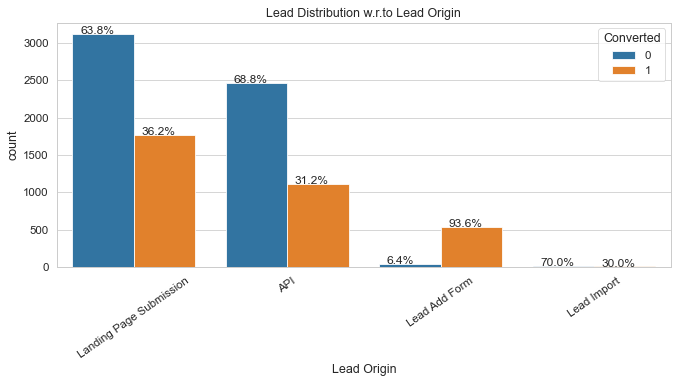

In [36]:
# Column 'Lead Origin'

plot_multi_bar(lead,'Lead Origin','Lead Distribution w.r.to Lead Origin', 
               lead['Lead Origin'].value_counts().index, hue='Converted')

##### Observation:
'Landing Page Submission' is the most common lead origin. However, the conversion rate is highest for 'Lead Add Form'.

#### Column 'Lead Source':

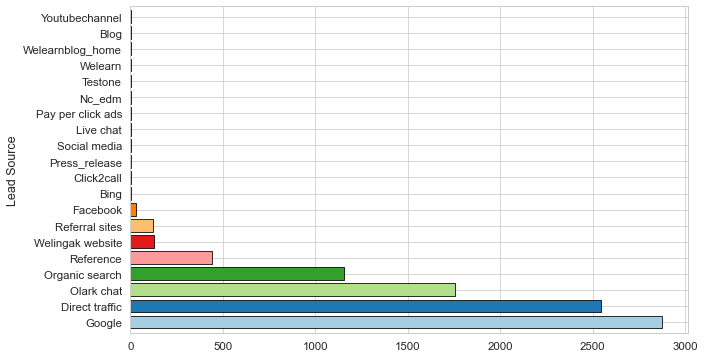

In [37]:
# Column 'Lead Source'

plt.figure(figsize = (10,6))
lead.groupby('Lead Source')['Lead Source'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', color = plt.cm.Paired(np.arange(len(lead))))
plt.show()

##### Observation:
'Google' and 'Direct Traffic' are the most common lead sources.

#### Column 'Specialization':

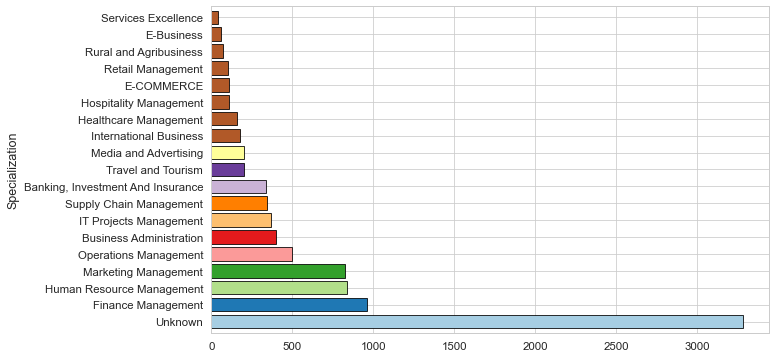

In [38]:
# Column 'Specialization'

plt.figure(figsize = (10,6))
lead.groupby('Specialization')['Specialization'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', color = plt.cm.Paired(np.arange(len(lead))))
                                                            
plt.show()

##### Observation:
There are many null/unknown values in Specialization, however, other than that we can see a mix of values chosen by the leads.

#### Column ' Occupation':

<Figure size 1080x288 with 0 Axes>

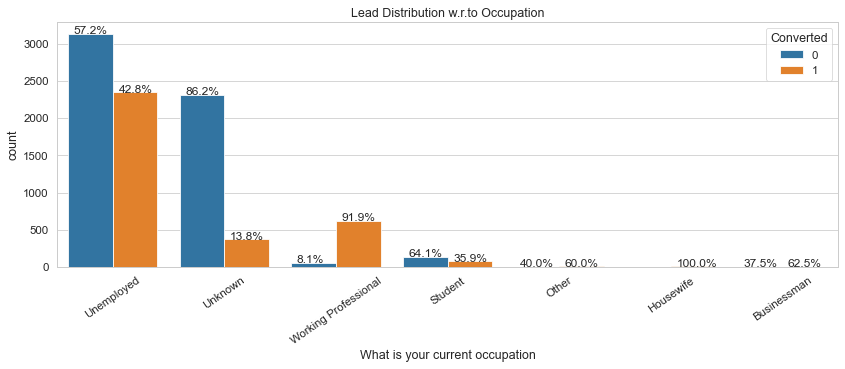

In [39]:
# Column 'Occupation'

plot_multi_bar(lead,'What is your current occupation','Lead Distribution w.r.to Occupation', 
               lead['What is your current occupation'].value_counts().index, hue='Converted')

##### Observation:
Majority of the leads fall under 'Unemployed'. However, the maximum conversion can be observed amongst the 'Working Professional' leads.

### 3.2. Numerical columns:

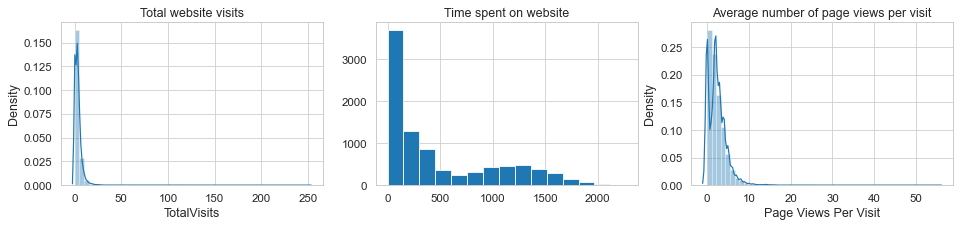

In [40]:
# Histogram distribution of each of the numerical columns
fig = plt.figure(figsize = (16, 3))
plt.subplot(1, 3, 1)
sns.distplot(lead.TotalVisits)
plt.title('Total website visits')

plt.subplot(1, 3, 2)
plt.hist(lead['Total Time Spent on Website'], bins = 15)
plt.title('Time spent on website')

plt.subplot(1, 3, 3)
sns.distplot(lead['Page Views Per Visit'])
plt.title('Average number of page views per visit')

plt.show()

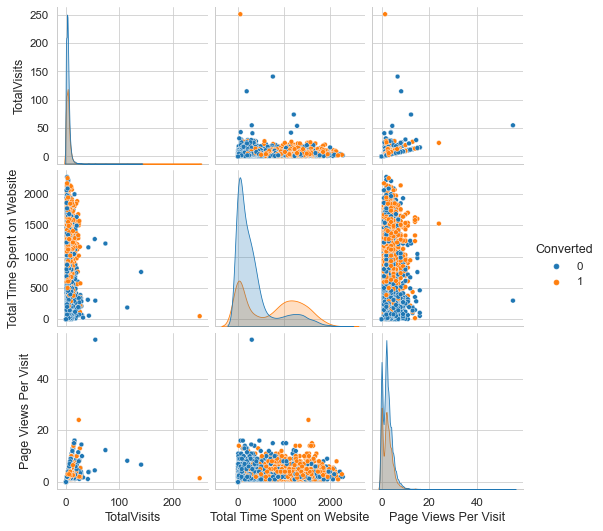

In [41]:
# Pair plot of numerical columns

sns.pairplot(lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']], diag_kind='kde', hue='Converted')
plt.show()

##### Observation:
A weak relationship may be observed between 'Page Views Per Visit' and 'TotalVisits'.
Also, it seems that more conversions happen with higher 'Total Time Spent on Website'.

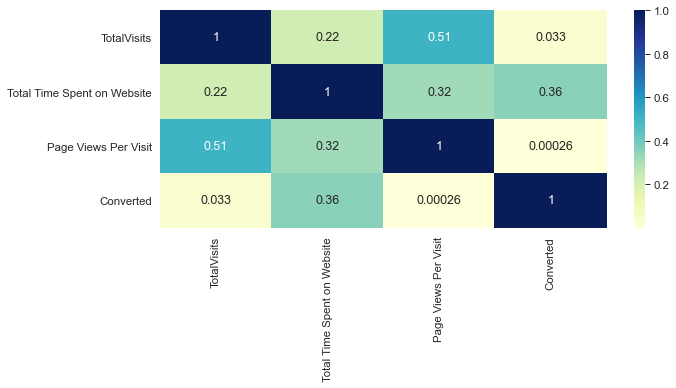

In [42]:
# Heatmap
plt.figure(figsize = (10,4))
sns.heatmap(lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']].corr(), cmap="YlGnBu", annot = True)
plt.show()

##### Observation:
High correlation may be observed between 'Page Views Per Visit' and 'TotalVisits'.

## Step 4. Data Preparation

### 4.1. Dummy variable creation
The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [43]:
# Finding the columns which are of type 'object'

temp = lead.loc[:, lead.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [44]:
# Creating dummy variables
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                             'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Adding the result to the master dataframe
lead = pd.concat([lead, dummy], axis=1)

In [45]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Unknown' which we can drop
dummy_spl = pd.get_dummies(lead['Specialization'], prefix = 'Specialization')

# Dropping the level 'Specialization_Unknown' by specifying it explicitly
dummy_spl = dummy_spl.drop(['Specialization_Unknown'], 1)

# Adding the result to the master dataframe
lead = pd.concat([lead, dummy_spl], axis = 1)

lead.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark chat           No   
1       660728                      API  Organic search           No   
2       660727  Landing Page Submission  Direct traffic           No   
3       660719  Landing Page Submission  Direct traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Blog  \
0                          0                        0                 0   
1                          0                        0                 0   
2                          0                        0                 0   
3                          0                        0                 0   
4                          0                        0                 0   

   Lead Source_Click2call  Lead Source_Direct traffic  Lead Source_Facebook  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                           1                     0   
3                       0                           1                     0   
4                       0                           0                     0   

   Lead Source_Google  Lead Source_Live chat  Lead Source_Nc_edm  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark chat  Lead Source_Organic search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per click ads  Lead Source_Press_release  \
0                              0                          0   
1                              0                          0   
2                              0                 

In [46]:
# Creating dummy variable separately for the variable 'What is your current occupation' 

dummy_spl = pd.get_dummies(lead['What is your current occupation'], prefix = 'Occupation')

# Dropping the level 'Occupation_Unknown' by specifying it explicitly
dummy_spl = dummy_spl.drop(['Occupation_Unknown'], 1)

# Adding the result to the master dataframe
lead = pd.concat([lead, dummy_spl], axis = 1)

lead.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark chat           No   
1       660728                      API  Organic search           No   
2       660727  Landing Page Submission  Direct traffic           No   
3       660719  Landing Page Submission  Direct traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0         0.00                            0                  0.00   
1          0         5.00                          674                  2.50   
2          1         2.00                         1532                  2.00   
3          0         1.00                          305                  1.00   
4          1         2.00                         1428                  1.00   

             Last Activity           Specialization  \
0  Page Visited on Website                  Unknown   
1             Email Opened                  Unknown   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Unknown   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Blog  \
0                          0                        0                 0   
1                          0                        0                 0   
2                          0                        0                 0   
3                          0                        0                 0   
4                          0                        0                 0   

   Lead Source_Click2call  Lead Source_Direct traffic  Lead Source_Facebook  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                           1                     0   
3                       0                           1                     0   
4                       0                           0                     0   

   Lead Source_Google  Lead Source_Live chat  Lead Source_Nc_edm  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark chat  Lead Source_Organic search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per click ads  Lead Source_Press_release  \
0                              0                          0   
1                              0                          0   
2                              0                 

In [47]:
# Dropping the variables for which the dummy variables have been created

lead = lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 
                  'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [48]:
# Let's take a look at the dataset again

lead.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0         0.00                            0   
1       660728          0         5.00                          674   
2       660727          1         2.00                         1532   
3       660719          0         1.00                          305   
4       660681          1         2.00                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                  0.00                                    0   
1                  2.50                                    0   
2                  2.00                                    1   
3                  1.00                                    1   
4                  1.00                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Blog  \
0                          0                        0                 0   
1                          0                        0                 0   
2                          0                        0                 0   
3                          0                        0                 0   
4                          0                        0                 0   

   Lead Source_Click2call  Lead Source_Direct traffic  Lead Source_Facebook  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                           1                     0   
3                       0                           1                     0   
4                       0                           0                     0   

   Lead Source_Google  Lead Source_Live chat  Lead Source_Nc_edm  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark chat  Lead Source_Organic search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per click ads  Lead Source_Press_release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social media  Lead Source_Testone  Lead Source_Welearn  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   

   Lead Source_Welearnblog_home  Lead Source_Welingak website  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0  

### 4.2. Test-Train Split
The next step is to split the dataset into training an testing sets.

In [49]:
# Putting all the feature variables in X

X = lead.drop(['Converted'], 1)
X.head()

Lead Number  TotalVisits  Total Time Spent on Website  \
0       660737         0.00                            0   
1       660728         5.00                          674   
2       660727         2.00                         1532   
3       660719         1.00                          305   
4       660681         2.00                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                  0.00                                    0   
1                  2.50                                    0   
2                  2.00                                    1   
3                  1.00                                    1   
4                  1.00                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Blog  \
0                          0                        0                 0   
1                          0                        0                 0   
2                          0                        0                 0   
3                          0                        0                 0   
4                          0                        0                 0   

   Lead Source_Click2call  Lead Source_Direct traffic  Lead Source_Facebook  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                           1                     0   
3                       0                           1                     0   
4                       0                           0                     0   

   Lead Source_Google  Lead Source_Live chat  Lead Source_Nc_edm  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark chat  Lead Source_Organic search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per click ads  Lead Source_Press_release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social media  Lead Source_Testone  Lead Source_Welearn  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   

   Lead Source_Welearnblog_home  Lead Source_Welingak website  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   Lead Source_Youtubechannel  Do

In [50]:
# Putting the target variable in y

y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
# Importing train_test_split from sklearn

from sklearn.model_selection import train_test_split

# Splitting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [52]:
# Creating a new dataframe to retain the Lead Number, so that we can assign the Lead scores later

Lead_Number = pd.DataFrame()
Lead_Number['Lead Number']=X_test['Lead Number']

# Dropping 'Lead Number' as it has no significance in our analysis

X_train = X_train.drop(['Lead Number'], 1)
X_test = X_test.drop(['Lead Number'], 1)

### 4.3. Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [53]:
# Importing MinMaxScaler from sklearn

from sklearn.preprocessing import MinMaxScaler

# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3009         0.01                         0.18                  2.00   
1012         0.01                         0.09                  2.00   
9226         0.00                         0.00                  0.00   
4750         0.01                         0.62                  2.00   
7987         0.02                         0.71                  2.50   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Blog  Lead Source_Click2call  \
3009                        0                 0                       0   
1012                        0                 0                       0   
9226                        0                 0                       0   
4750                        0                 0                       0   
7987                        0                 0                       0   

      Lead Source_Direct traffic  Lead Source_Facebook  Lead Source_Google  \
3009                           1                     0                   0   
1012                           1                     0                   0   
9226                           0                     0                   0   
4750                           1                     0                   0   
7987                           1                     0                   0   

      Lead Source_Live chat  Lead Source_Nc_edm  Lead Source_Olark chat  \
3009                      0                   0                       0   
1012                      0                   0                       0   
9226                      0                   0                       1   
4750                      0                   0                       0   
7987                      0                   0                       0   

      Lead Source_Organic search  Lead Source_Pay per click ads  \
3009                           0                              0   
1012                           0                              0   
9226                           0                              0   
4750                           0                              0   
7987                           0                              0   

      Lead Source_Press_release  Lead Source_Reference  \
3009                          0                      0   
1012                          0                      0   
9226                          0                      0   
4750                          0                      0   
7987                          0                      0   

      Lead Source_Referral sites  Lead Source_Social media  \
3009                           0                         0   
1012                           0                         0   
9226                           0                         0   
4750                           0                         0   
7987                           0                         0   

      Lead Source_Testone  Lead Source_Welearn  Lead Source_Welearnblog_home  \
3009                    0                    0                             0   
1012                    0                    0                             0   
9226                    0                    0                             0   
4750                    0                    0                             0   
7987                    0                    0                             0   

      Lead Source_Welingak website  Lead Source_Youtubechannel  \
3009                             0                           0   
1012                           

### 4.4. Correlations

Let's now look at the correlations.

In [54]:
# Listing the correlation values (amongst the independent variables) in descending order

correlation = lead.corr()
corre = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()
corre.columns=['Feature1','Feature2','Correlation']
corre.dropna(subset=['Correlation'],inplace=True)
corre['Correlation_Absolute']=corre['Correlation'].abs().round(2)
corre[corre['Correlation_Absolute']>0.50].sort_values(by = 'Correlation_Absolute', ascending = False)

Feature1  \
3979         Last Notable Activity_Email Marked Spam   
4658    Last Notable Activity_Resubscribed to emails   
931                             Lead Source_Facebook   
4913              Last Notable Activity_Unsubscribed   
1602                           Lead Source_Reference   
4064              Last Notable Activity_Email Opened   
4743                  Last Notable Activity_SMS Sent   
3894        Last Notable Activity_Email Link Clicked   
4319  Last Notable Activity_Had a Phone Conversation   
4149            Last Notable Activity_Email Received   
4573   Last Notable Activity_Page Visited on Website   
2463                     Last Activity_Email Bounced   
3706      A free copy of Mastering The Interview_Yes   
4828               Last Notable Activity_Unreachable   
3701      A free copy of Mastering The Interview_Yes   
1265                          Lead Source_Olark chat   
845                       Lead Source_Direct traffic   
3308                          Last Activity_SMS Sent   
338                             Page Views Per Visit   

                                    Feature2  Correlation  \
3979         Last Activity_Email Marked Spam         1.00   
4658    Last Activity_Resubscribed to emails         1.00   
931                  Lead Origin_Lead Import         0.98   
4913              Last Activity_Unsubscribed         0.87   
1602               Lead Origin_Lead Add Form         0.87   
4064              Last Activity_Email Opened         0.86   
4743                  Last Activity_SMS Sent         0.85   
3894        Last Activity_Email Link Clicked         0.80   
4319  Last Activity_Had a Phone Conversation         0.75   
4149            Last Activity_Email Received         0.71   
4573   Last Activity_Page Visited on Website         0.69   
2463                        Do Not Email_Yes         0.62   
3706              Lead Source_Direct traffic         0.60   
4828               Last Activity_Unreachable         0.59   
3701     Lead Origin_Landing Page Submission         0.56   
1265     Lead Origin_Landing Page Submission        -0.53   
845      Lead Origin_Landing Page Submission         0.52   
3308              Last Activity_Email Opened        -0.51   
338                              TotalVisits         0.51   

      Correlation_Absolute  
3979                  1.00  
4658                  1.00  
931                   0.98  
4913                  0.87  
1602                  0.87  
4064                  0.86  
4743                  0.85  
3894                  0.80  
4319                  0.75  
4149                  0.71  
4573                  0.69  
2463                  0.62  
3706                  0.60  
4828                  0.59  
3701                  0.56  
1265                  0.53  
845                   0.52  
3308                  0.51  
338                   0.51

##### Observation:

Some features have very high collinearity.

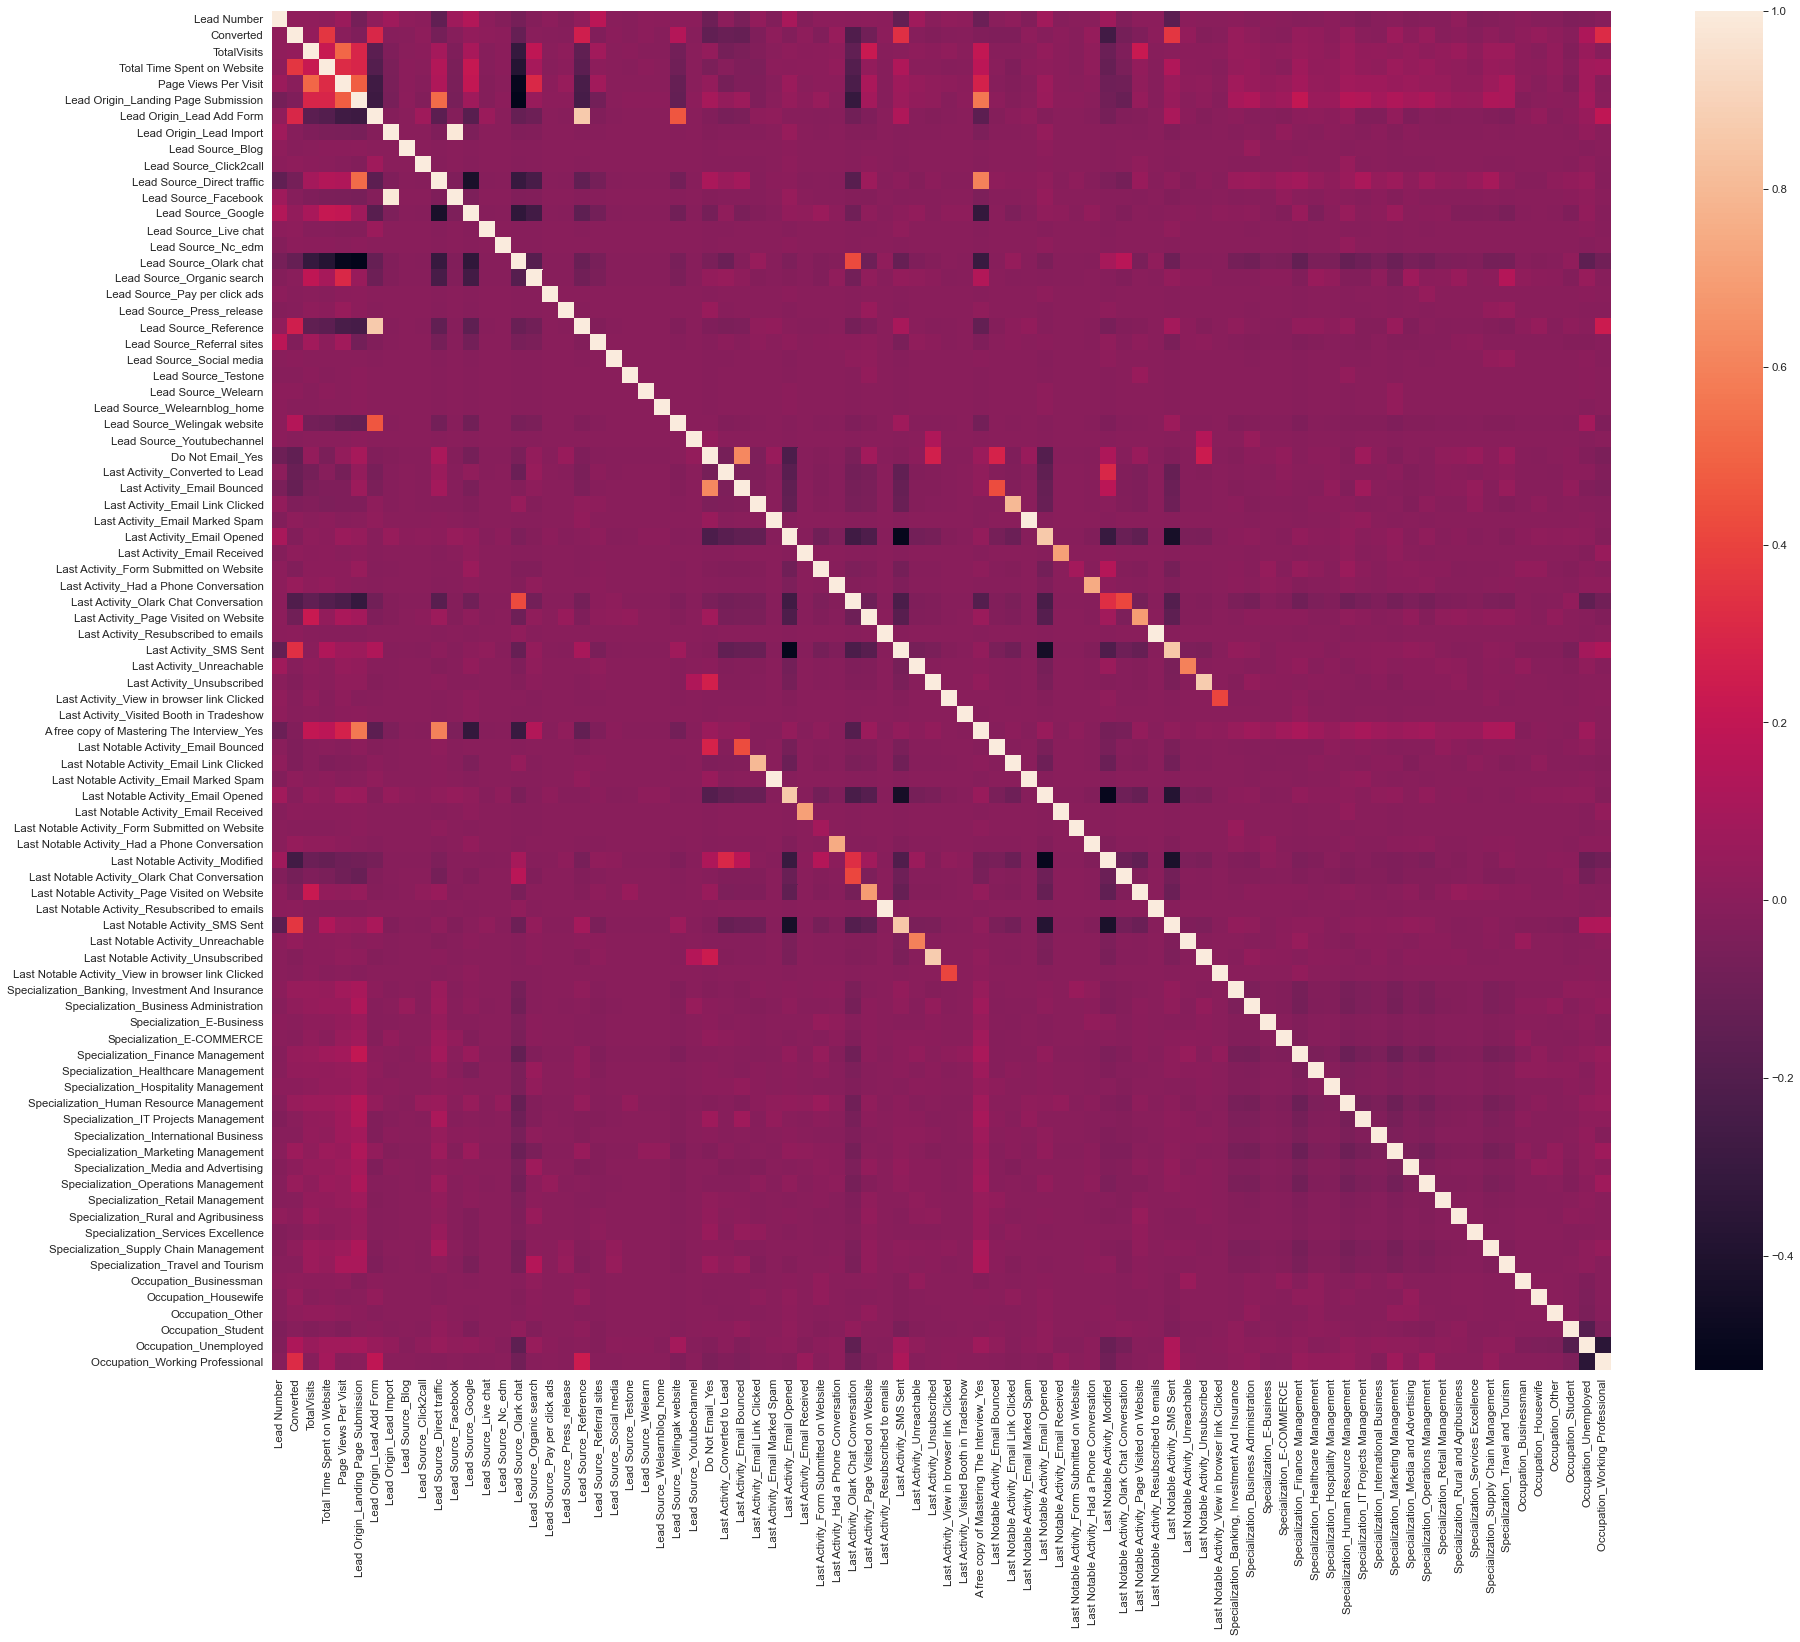

In [55]:
# Looking at the correlation table
plt.figure(figsize = (30,25))
sns.heatmap(lead.corr())
plt.show()

## Step 5. Model Building

Let's now move to model building. After creating dummy variables, the number of variables present in the dataset has increased and it's difficult to evaluate manually. So the best way to approach is to select a small set of features from this pool of variables using RFE.

In [56]:
# Importing 'LogisticRegression' and creating a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
# Importing RFE and running it to select 18 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [58]:
# Listing features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 63),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 50),
 ('Lead Source_Blog', False, 47),
 ('Lead Source_Click2call', False, 39),
 ('Lead Source_Direct traffic', True, 1),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live chat', False, 48),
 ('Lead Source_Nc_edm', False, 16),
 ('Lead Source_Olark chat', False, 15),
 ('Lead Source_Organic search', True, 1),
 ('Lead Source_Pay per click ads', False, 46),
 ('Lead Source_Press_release', False, 60),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral sites', True, 1),
 ('Lead Source_Social media', False, 41),
 ('Lead Source_Testone', False, 45),
 ('Lead Source_Welearn', False, 65),
 ('Lead Source_Welearnblog_home', False, 53),
 ('Lead Source_Welingak website', True, 1),
 ('Lead Source_Youtubechannel', Fal

In [59]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct traffic',
       'Lead Source_Google', 'Lead Source_Organic search',
       'Lead Source_Referral sites', 'Lead Source_Welingak website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Unreachable', 'Occupation_Housewife',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional'],
      dtype='object')

##### Observation:
Now we have all the variables selected by RFE. Let's use these variables to create a logistic regression model using statsmodels.

In [60]:
# Sub-setting only the columns selected by RFE

X_train = X_train[col]

In [61]:
# Listing the correlation values (amongst the independent variables) in descending order

correlation = X_train.corr()
corre = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()
corre.columns=['Feature1','Feature2','Correlation']
corre.dropna(subset=['Correlation'],inplace=True)
corre['Correlation_Absolute']=corre['Correlation'].abs().round(2)
corre[corre['Correlation_Absolute']>0.30].sort_values(by = 'Correlation_Absolute', ascending = False)

Feature1                    Feature2  Correlation  \
128     Lead Source_Welingak website   Lead Origin_Lead Add Form         0.47   
75                Lead Source_Google  Lead Source_Direct traffic        -0.43   
322  Occupation_Working Professional       Occupation_Unemployed        -0.36   

     Correlation_Absolute  
128                  0.47  
75                   0.43  
322                  0.36

In [62]:
# Importing statsmodels

import statsmodels.api as sm

**Iteration 1:**

In [63]:
# Fitting a Logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.5
Date:                Wed, 08 Sep 2021   Deviance:                       5146.9
Time:                        17:39:44   Pearson chi2:                 6.20e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.0174      0.109    -18.531      0.000      -2.231      -1.804
TotalVisits                                8.3094      2.078      3.998      0.000       4.236      12.383
Total Time Spent on Website                4.6534      0.167     27.787      0.000       4.325       4.982
Lead Origin_Lead Add Form                  2.1997      0.229      9.626      0.000       1.752       2.648
Lead Source_Direct traffic                -1.8283      0.123    -14.808      0.000      -2.070      -1.586
Lead Source_Google                        -1.4127      0.118    -11.988      0.000      -1.644      -1.182
Lead Source_Organic search                -1.7218      0.145    -11.915      0.000      -2.005      -1.439
Lead Source_Referral sites                -1.9067      0.366     -5.214      0.000      -2.623      -1.190
Lead Source_Welingak website               1.9750      0.752      2.627      0.009       0.501       3.449
Do Not Email_Yes                          -1.6081      0.175     -9.214      0.000      -1.950      -1.266
Last Activity_Had a Phone Conversation     2.6947      0.743      3.628      0.000       1.239       4.150
Last Activity_Olark Chat Conversation     -1.3140      0.165     -7.975      0.000      -1.637      -0.991
Last Activity_SMS Sent                     1.3423      0.076     17.762      0.000       1.194       1.490
Last Notable Activity_Unreachable          2.1234      0.495      4.291      0.000       1.153       3.093
Occupation_Housewife                      24.1950   1.55e+04      0.002      0.999   -3.04e+04    3.04e+04
Occupation_Other                           2.0321      0.729      2.787      0.005       0.603       3.461
Occupation_Student                         1.4523      0.231      6.299      0.000       1.000       1.904
Occupation_Unemployed                      1.2854      0.089     14.520      0.000       1.112       1.459
Occupation_Working Professional            3.7629      0.199     18.946      0.000       3.374       4.152
==========================================================================================================
"""

In [64]:
# Importing variance_inflation_factor from sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0                                    const 9.17
5                       Lead Source_Google 2.49
4               Lead Source_Direct traffic 2.45
6               Lead Source_Organic search 1.88
3                Lead Origin_Lead Add Form 1.80
18         Occupation_Working Professional 1.33
2              Total Time Spent on Website 1.32
17                   Occupation_Unemployed 1.32
8             Lead Source_Welingak website 1.31
11   Last Activity_Olark Chat Conversation 1.28
1                              TotalVisits 1.17
12                  Last Activity_SMS Sent 1.11
7               Lead Source_Referral sites 1.10
16                      Occupation_Student 1.06
9                         Do Not Email_Yes 1.03
14                    Occupation_Housewife 1.01
15                        Occupation_Other 1.01
10  Last Activity_Had a Phone Conversation 1.00
13       Last Notable Activity_Unreachable 1.00

##### Observation: 
High p-values observed for 'Occupation_Housewife' which indicates that this feature is not significant for our model. The VIF values are less than 4 except for the constant (intercept) we added. Let's drop the column 'Occupation_Housewife' and refit.

In [65]:
# Dropping the column 'Occupation_Housewife'

X_train.drop('Occupation_Housewife', axis = 1, inplace = True)

**Iteration 2:**

In [66]:
# Refitting the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2582.6
Date:                Wed, 08 Sep 2021   Deviance:                       5165.1
Time:                        17:39:44   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.9930      0.108    -18.427      0.000      -2.205      -1.781
TotalVisits                                8.2065      2.073      3.959      0.000       4.143      12.270
Total Time Spent on Website                4.6502      0.167     27.831      0.000       4.323       4.978
Lead Origin_Lead Add Form                  2.2639      0.229      9.899      0.000       1.816       2.712
Lead Source_Direct traffic                -1.8182      0.123    -14.760      0.000      -2.060      -1.577
Lead Source_Google                        -1.4062      0.118    -11.958      0.000      -1.637      -1.176
Lead Source_Organic search                -1.7003      0.144    -11.806      0.000      -1.983      -1.418
Lead Source_Referral sites                -1.9003      0.365     -5.208      0.000      -2.615      -1.185
Lead Source_Welingak website               1.9196      0.752      2.553      0.011       0.446       3.394
Do Not Email_Yes                          -1.6128      0.174     -9.244      0.000      -1.955      -1.271
Last Activity_Had a Phone Conversation     2.6877      0.742      3.620      0.000       1.233       4.143
Last Activity_Olark Chat Conversation     -1.3208      0.165     -8.022      0.000      -1.643      -0.998
Last Activity_SMS Sent                     1.3323      0.075     17.662      0.000       1.184       1.480
Last Notable Activity_Unreachable          2.1075      0.494      4.265      0.000       1.139       3.076
Occupation_Other                           2.0019      0.729      2.747      0.006       0.574       3.430
Occupation_Student                         1.4220      0.230      6.172      0.000       0.970       1.874
Occupation_Unemployed                      1.2571      0.088     14.332      0.000       1.085       1.429
Occupation_Working Professional            3.7325      0.198     18.832      0.000       3.344       4.121
==========================================================================================================
"""

In [67]:
# Making a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
0                                    const 9.16
5                       Lead Source_Google 2.49
4               Lead Source_Direct traffic 2.45
6               Lead Source_Organic search 1.88
3                Lead Origin_Lead Add Form 1.79
17         Occupation_Working Professional 1.33
2              Total Time Spent on Website 1.32
16                   Occupation_Unemployed 1.32
8             Lead Source_Welingak website 1.31
11   Last Activity_Olark Chat Conversation 1.28
1                              TotalVisits 1.17
12                  Last Activity_SMS Sent 1.11
7               Lead Source_Referral sites 1.10
15                      Occupation_Student 1.06
9                         Do Not Email_Yes 1.03
14                        Occupation_Other 1.01
10  Last Activity_Had a Phone Conversation 1.00
13       Last Notable Activity_Unreachable 1.00

##### Observation:

1. Variables  have a p-value less than 0.05. 
2. The VIF values are <4.

The model looks good enough. Let us evaluate the model against the test data in the next step.

## Step 6. Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

### 6.1. Sensitivity-Specificity View:

In [68]:
# Getting the predicted values on the train set

y_train_pred = res2.predict(X_train_sm)
y_train_pred[:5]

3009   0.05
1012   0.23
9226   0.64
4750   0.62
7987   0.90
dtype: float64

In [69]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05134185, 0.22631744, 0.64483033, 0.61521434, 0.90470819,
       0.79843593, 0.03581753, 0.93076714, 0.85087027, 0.87770101])

**Creating a dataframe with the actual conversion flag and the predicted probabilities**

In [70]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0             0.05
1          0             0.23
2          0             0.64
3          1             0.62
4          1             0.90

**Creating a new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0**

In [71]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0             0.05          0
1          0             0.23          0
2          0             0.64          1
3          1             0.62          1
4          1             0.90          1

Now we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [72]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

In [73]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3450  455]
 [ 728 1718]]


In [74]:
            # Predicted   not_converted   converted
# Actual
# not_converted               3450         455
# converted                   728          1718  

In [75]:
# Let's check the overall Accuracy

print("Accuracy on Train dataset: ", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy on Train dataset:  0.8137301212407495


In [76]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
# Calculating the 'Sensitivity' of the model
print("1. 'Sensitivity' of the model (on train dataset): ", (TP / float(TP+FN)))

# Calculating the 'Specificity' of the model
print("2. 'Specificity' of the model (on train dataset): ", (TN / float(TN+FP)))

# Calculating the 'False Postive Rate' - predicting conversion when the lead has not converted
print("3. 'False Postive Rate' of the model (on train dataset): ", (FP/ float(TN+FP)))

# Calculating the 'Positive Predictive Value'
print("4. 'Positive Predictive Value' of the model (on train dataset): ", (TP / float(TP+FP)))

# Calculating the 'Negative Predictive Value'
print("5. 'Positive Predictive Value' of the model (on train dataset): ", (TN / float(TN+ FN)))

1. 'Sensitivity' of the model (on train dataset):  0.7023712183156173
2. 'Specificity' of the model (on train dataset):  0.8834827144686299
3. 'False Postive Rate' of the model (on train dataset):  0.11651728553137004
4. 'Positive Predictive Value' of the model (on train dataset):  0.7906120570639669
5. 'Positive Predictive Value' of the model (on train dataset):  0.8257539492580181


### Finding the Optimal Cutoff with ROC:

The conversion probability cut-off 0.5 was just an arbitrary figure to loosely check the model performace. But in order to get good results, we have to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [78]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

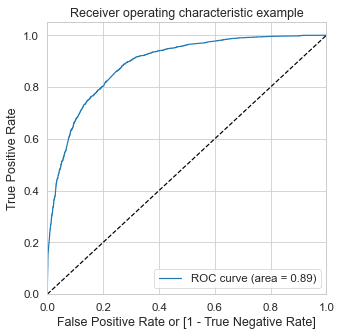

In [80]:
# Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

##### Observation:

The area under the curve of the ROC is 0.89 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [81]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(15)

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0           0             0.05          0    1    0    0    0    0    0    0   
1           0             0.23          0    1    1    1    0    0    0    0   
2           0             0.64          1    1    1    1    1    1    1    1   
3           1             0.62          1    1    1    1    1    1    1    1   
4           1             0.90          1    1    1    1    1    1    1    1   
5           1             0.80          1    1    1    1    1    1    1    1   
6           0             0.04          0    1    0    0    0    0    0    0   
7           1             0.93          1    1    1    1    1    1    1    1   
8           1             0.85          1    1    1    1    1    1    1    1   
9           0             0.88          1    1    1    1    1    1    1    1   
10          0             0.34          0    1    1    1    1    0    0    0   
11          0             0.11          0    1    1    0    0    0    0    0   
12          0             0.10          0    1    1    0    0    0    0    0   
13          1             0.64          1    1    1    1    1    1    1    1   
14          1             0.96          1    1    1    1    1    1    1    1   

    0.7  0.8  0.9  
0     0    0    0  
1     0    0    0  
2     0    0    0  
3     0    0    0  
4     1    1    1  
5     1    0    0  
6     0    0    0  
7     1    1    1  
8     1    1    0  
9     1    1    0  
10    0    0    0  
11    0    0    0  
12    0    0    0  
13    0    0    0  
14    1    1    1

In [82]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.39   1.00   0.00
0.10  0.10      0.60   0.98   0.37
0.20  0.20      0.77   0.92   0.67
0.30  0.30      0.79   0.87   0.74
0.40  0.40      0.81   0.77   0.84
0.50  0.50      0.81   0.70   0.88
0.60  0.60      0.81   0.64   0.91
0.70  0.70      0.78   0.52   0.95
0.80  0.80      0.76   0.43   0.97
0.90  0.90      0.71   0.28   0.99


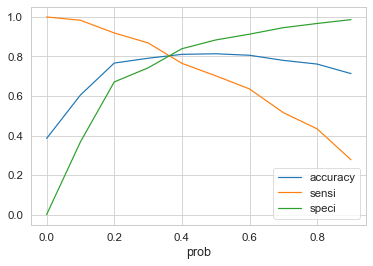

In [83]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Observation:
From the curve above, 0.38 is the optimum point, let's take 0.4 as a cutoff probability.¶

In [84]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head(10)

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0             0.05          0    1    0    0    0    0    0    0   
1          0             0.23          0    1    1    1    0    0    0    0   
2          0             0.64          1    1    1    1    1    1    1    1   
3          1             0.62          1    1    1    1    1    1    1    1   
4          1             0.90          1    1    1    1    1    1    1    1   
5          1             0.80          1    1    1    1    1    1    1    1   
6          0             0.04          0    1    0    0    0    0    0    0   
7          1             0.93          1    1    1    1    1    1    1    1   
8          1             0.85          1    1    1    1    1    1    1    1   
9          0             0.88          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  Final_Predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                1  
3    0    0    0                1  
4    1    1    1                1  
5    1    0    0                1  
6    0    0    0                0  
7    1    1    1                1  
8    1    1    0                1  
9    1    1    0                1

In [85]:
# Let's check the accuracy now

print("Accuracy (on train dataset): ", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

Accuracy (on train dataset):  0.8107384663832468


In [86]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3277,  628],
       [ 574, 1872]], dtype=int64)

In [87]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [88]:
# Calculating the 'Sensitivity' of the model
print("1. 'Sensitivity' of the model (on train dataset): ", (TP / float(TP+FN)))

# Calculating the 'Specificity' of the model
print("2. 'Specificity' of the model (on train dataset): ", (TN / float(TN+FP)))

# Calculating the 'False Postive Rate' - predicting conversion when the lead has not converted
print("3. 'False Postive Rate' of the model (on train dataset): ", (FP/ float(TN+FP)))

# Calculating the 'Positive Predictive Value'
print("4. 'Positive Predictive Value' of the model (on train dataset): ", (TP / float(TP+FP)))

# Calculating the 'Negative Predictive Value'
print("5. 'Positive Predictive Value' of the model (on train dataset): ", (TN / float(TN+ FN)))

1. 'Sensitivity' of the model (on train dataset):  0.7653311529026983
2. 'Specificity' of the model (on train dataset):  0.8391805377720871
3. 'False Postive Rate' of the model (on train dataset):  0.16081946222791293
4. 'Positive Predictive Value' of the model (on train dataset):  0.7488
5. 'Positive Predictive Value' of the model (on train dataset):  0.8509478057647364


##### Observation:
This threshold or cutoff point seems good to go ahead with.

### Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [89]:
# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website']])

In [90]:
# Selecting the same columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
3271         0.02                         0.07                          0   
1490         0.02                         0.68                          0   
7936         0.01                         0.03                          0   
4216         0.00                         0.00                          1   
3830         0.03                         0.07                          0   

      Lead Source_Direct traffic  Lead Source_Google  \
3271                           0                   1   
1490                           1                   0   
7936                           0                   1   
4216                           0                   0   
3830                           0                   0   

      Lead Source_Organic search  Lead Source_Referral sites  \
3271                           0                           0   
1490                           0                           0   
7936                           0                           0   
4216                           0                           0   
3830                           1                           0   

      Lead Source_Welingak website  Do Not Email_Yes  \
3271                             0                 0   
1490                             0                 0   
7936                             0                 0   
4216                             0                 0   
3830                             0                 0   

      Last Activity_Had a Phone Conversation  \
3271                                       0   
1490                                       0   
7936                                       0   
4216                                       0   
3830                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
3271                                      0                       0   
1490                                      0                       0   
7936                                      0                       0   
4216                                      0                       0   
3830                                      0                       0   

      Last Notable Activity_Unreachable  Occupation_Housewife  \
3271                                  0                     0   
1490                                  0                     0   
7936                                  0                     0   
4216                                  0                     0   
3830                                  0                     0   

      Occupation_Other  Occupation_Student  Occupation_Unemployed  \
3271                 0                   0                      0   
1490                 0                   0                      0   
7936                 0                   0                      0   
4216                 0                   1                      0   
3830                 0                   0                      0   

      Occupation_Working Professional  
3271                                0  
1490                                1  
7936                                0  
4216                                0  
3830                                0

In [91]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [92]:
# Checking X_test_sm

X_test_sm

const  TotalVisits  Total Time Spent on Website  \
3271   1.00         0.02                         0.07   
1490   1.00         0.02                         0.68   
7936   1.00         0.01                         0.03   
4216   1.00         0.00                         0.00   
3830   1.00         0.03                         0.07   
...     ...          ...                          ...   
850    1.00         0.01                         0.37   
2879   1.00         0.01                         0.26   
6501   1.00         0.03                         0.60   
7155   1.00         0.01                         0.23   
376    1.00         0.02                         0.17   

      Lead Origin_Lead Add Form  Lead Source_Direct traffic  \
3271                          0                           0   
1490                          0                           1   
7936                          0                           0   
4216                          1                           0   
3830                          0                           0   
...                         ...                         ...   
850                           0                           0   
2879                          0                           0   
6501                          0                           1   
7155                          0                           1   
376                           0                           0   

      Lead Source_Google  Lead Source_Organic search  \
3271                   1                           0   
1490                   0                           0   
7936                   1                           0   
4216                   0                           0   
3830                   0                           1   
...                  ...                         ...   
850                    1                           0   
2879                   1                           0   
6501                   0                           0   
7155                   0                           0   
376                    1                           0   

      Lead Source_Referral sites  Lead Source_Welingak website  \
3271                           0                             0   
1490                           0                             0   
7936                           0                             0   
4216                           0                             0   
3830                           0                             0   
...                          ...                           ...   
850                            0                             0   
2879                           0                             0   
6501                           0                             0   
7155                           0                             0   
376                            0                             0   

      Do Not Email_Yes  Last Activity_Had a Phone Conversation  \
3271                 0                                       0   
1490                 0                                       0   
7936                 0                                       0   
4216                 0                                       0   
3830                 0                                       0   
...                ...                                     ...   
850                  0                                       0   
2879                 0                                       0   
6501                 0                                       0   
7155                 0                                       0   
376                  0                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
3271                                      0                       0   
1490                                      0                       0   
7936                                      0                       0   
4216                 

In [93]:
# Dropping the features with high p-values from X_test as well

X_test.drop(['Occupation_Housewife'], 1, inplace = True)

In [94]:
# Making predictions on the test set and storing it in the variable 'y_test_pred'

y_test_pred = res2.predict(sm.add_constant(X_test))

In [95]:
y_test_pred[:10]

3271   0.05
1490   0.96
7936   0.04
4216   0.84
3830   0.04
1800   0.67
6507   0.39
4821   0.26
4223   0.95
4714   0.34
dtype: float64

In [96]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [97]:
# Let's see the head

y_pred_1.head()

0
3271 0.05
1490 0.96
7936 0.04
4216 0.84
3830 0.04

In [98]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [99]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [100]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [101]:
# Checking 'y_pred_final'

y_pred_final.head()

Converted    0
0          0 0.05
1          1 0.96
2          0 0.04
3          1 0.84
4          0 0.04

In [102]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [103]:
# Let's see the head of y_pred_final

y_pred_final.head(10)

Converted  Conversion_Prob
0          0             0.05
1          1             0.96
2          0             0.04
3          1             0.84
4          0             0.04
5          1             0.67
6          0             0.39
7          0             0.26
8          1             0.95
9          0             0.34

In [104]:
# Making predictions on the test set using 0.38 as the cutoff

y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [105]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  Final_Predicted
0          0             0.05                0
1          1             0.96                1
2          0             0.04                0
3          1             0.84                1
4          0             0.04                0

In [106]:
# Let's check the overall accuracy

print("Accuracy of the model (on test dataset): ", metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Final_Predicted))

Accuracy of the model (on test dataset):  0.8134410576569959


In [107]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Final_Predicted )
confusion2

array([[1451,  283],
       [ 225,  764]], dtype=int64)

In [108]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
# Calculating the 'Sensitivity' of the model
print("1. 'Sensitivity' of the model (on test dataset): ", (TP / float(TP+FN)))

# Calculating the 'Specificity' of the model
print("2. 'Specificity' of the model (on test dataset): ", (TN / float(TN+FP)))

# Calculating the 'False Postive Rate' - predicting conversion when the lead has not converted
print("3. 'False Postive Rate' of the model (on test dataset): ", (FP/ float(TN+FP)))

# Calculating the 'Positive Predictive Value'
print("4. 'Positive Predictive Value' of the model (on test dataset): ", (TP / float(TP+FP)))

# Calculating the 'Negative Predictive Value'
print("5. 'Positive Predictive Value' of the model (on test dataset): ", (TN / float(TN+ FN)))

1. 'Sensitivity' of the model (on test dataset):  0.7724974721941354
2. 'Specificity' of the model (on test dataset):  0.8367935409457901
3. 'False Postive Rate' of the model (on test dataset):  0.1632064590542099
4. 'Positive Predictive Value' of the model (on test dataset):  0.7297039159503342
5. 'Positive Predictive Value' of the model (on test dataset):  0.8657517899761337


### 6.2. Precision-Recall View

Let's now also build the training model using the precision-recall view

In [110]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3450,  455],
       [ 728, 1718]], dtype=int64)

In [111]:
#Precision = TP / (TP + FP)
print("1. 'Precision' of the model (on train dataset): ", confusion[1,1]/(confusion[0,1]+confusion[1,1]))
      
#Recall = TP / (TP + FN)
print("2. 'Recall' of the model (on train dataset): ", confusion[1,1]/(confusion[1,0]+confusion[1,1]))

1. 'Precision' of the model (on train dataset):  0.7906120570639669
2. 'Recall' of the model (on train dataset):  0.7023712183156173


### Precision and Recall tradeoff

In [112]:
# Importing necessary functions and modules

from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


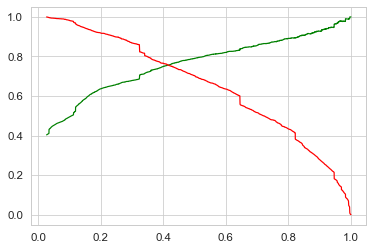

In [115]:
# Plotting the Precision-Recall curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [116]:
# From the above curve, considering the cutoff as 0.42

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0             0.05          0    1    0    0    0    0    0    0   
1          0             0.23          0    1    1    1    0    0    0    0   
2          0             0.64          1    1    1    1    1    1    1    1   
3          1             0.62          1    1    1    1    1    1    1    1   
4          1             0.90          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  Final_Predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                1  
3    0    0    0                1  
4    1    1    1                1

In [117]:
# Let's check the accuracy now

print("Accuracy of the model (on train dataset with precision-recall): ",  metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

Accuracy of the model (on train dataset with precision-recall):  0.8121555660525901


In [118]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3314,  591],
       [ 602, 1844]], dtype=int64)

In [119]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Calculating Precision

print("1. Precision (on train dataset): ", (TP/(TP+FP)))

# Calculate Recall

print("2. Recall (on train dataset): ", (TP/(TP+FN)))

1. Precision (on train dataset):  0.7572895277207392
2. Recall (on train dataset):  0.7538838920686836


##### Observation:
This threshold or cutoff point seems good enough to go ahead with.

### Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [121]:
# Making predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res2.predict(sm.add_constant(X_test))

In [122]:
y_test_pred[:10]

3271   0.05
1490   0.96
7936   0.04
4216   0.84
3830   0.04
1800   0.67
6507   0.39
4821   0.26
4223   0.95
4714   0.34
dtype: float64

In [123]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [124]:
# Let's see the head

y_pred_1.head()

0
3271 0.05
1490 0.96
7936 0.04
4216 0.84
3830 0.04

In [125]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)


In [126]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [128]:
# Check 'y_pred_final'

y_pred_final.head()

Converted    0
0          0 0.05
1          1 0.96
2          0 0.04
3          1 0.84
4          0 0.04

In [129]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [130]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          0             0.05
1          1             0.96
2          0             0.04
3          1             0.84
4          0             0.04

In [131]:
# Making predictions on the test set using 0.42 as the cutoff

y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [132]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  Final_Predicted
0          0             0.05                0
1          1             0.96                1
2          0             0.04                0
3          1             0.84                1
4          0             0.04                0

In [133]:
# Let's check the overall accuracy

print("Accuracy of the model (on test dataset with precision-recall method): ", metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.Final_Predicted))

Accuracy of the model (on test dataset with precision-recall method):  0.8138082996694822


In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.Final_Predicted )
confusion2

array([[1479,  255],
       [ 252,  737]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Calculating Precision

print("1. Precision (on test dataset): ", (TP/(TP+FP)))

# Calculate Recall

print("2. Recall (on test dataset): ", (TP/(TP+FN)))

1. Precision (on test dataset):  0.7429435483870968
2. Recall (on test dataset):  0.7451971688574317


#### Conclusion:

1. Accuracy of the model : (a) on training data:  81.07, (b) on test data: 81.34
2. Sensitivity of the model : (a) on training data:  76.53, (b) on test data: 77.25
3. Specificity of the model : (a) on training data:  83.92, (b) on test data: 83.68

Also, from Precision-Recall view:
1. Accuracy : (a) on training data:  81.22, (b) on test data: 81.38
2. Precision : (a) on training data:  75.73, (b) on test data: 74.29
3. Recall : (a) on training data:  75.39, (b) on test data: 74.52

### 6.3. Assigning Lead Score

In [137]:
# Assigning 'Lead Score' (Conversion_Probability*100) to the Leads, such that higher score indicates higher conversion probability

Lead_Number.reset_index(drop=True, inplace=True)
Lead_Score = pd.concat([Lead_Number['Lead Number'], y_pred_final],axis=1)
Lead_Score.head(10)

Lead Number  Converted  Conversion_Prob  Final_Predicted
0       628652          0             0.05                0
1       644500          1             0.96                1
2       588935          0             0.04                0
3       619437          1             0.84                1
4       623381          0             0.04                0
5       641959          1             0.67                1
6       599959          0             0.39                0
7       613711          0             0.26                0
8       619391          1             0.95                1
9       614597          0             0.34                0

## 7. Summary

- The Accuracy, Sensitivity-Specificity and Precision-Recall values are in line with the requirement.
- This model has the ability to adjust with X-Education's  changing business requirements in future.
- The probability or the lead score for each lead predicted by this model can help sorting out the best prospects and focus more on them.
- Following features have emerged as the top features in predicting successful conversion:
    - `TotalVisits`
    - `Total Time Spent on Website`
    - `Occupation_Working Professional`
    - `Lead Origin_Lead Add Form`